# Chapter 3
## GLM

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sfm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/data3a.csv')

In [3]:
data.head(5)

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [4]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


## Data visualization

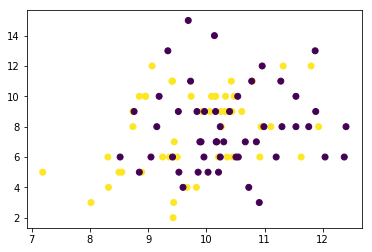

In [5]:
plt.scatter(data.x, data.y, c=(data.f=='C'))

{'whiskers': [<matplotlib.lines.Line2D at 0x1c25751c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2575e320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c25751860>,
 'medians': [<matplotlib.lines.Line2D at 0x1c2575e9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c2575ecf8>,
 'means': []}

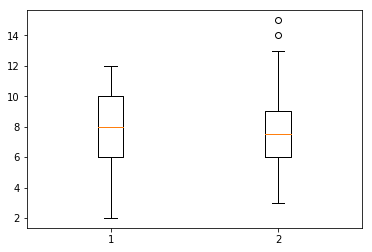

In [6]:
fig, ax = plt.subplots()
ax.boxplot((data[data.f=='C'].y, data[data.f=='T'].y))

## Poisson Regression
with numerical feature

In [7]:
result = sfm.glm(formula='y ~ x', data=data, family=sm.families.Poisson()).fit()
result_x = result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 23 May 2019   Deviance:                       84.993
Time:                        11:28:18   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

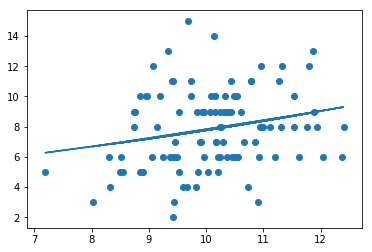

In [8]:
params = result.params
preds = np.exp(params[0] + params[1]*data.x)
plt.plot(data.x, preds)
plt.scatter(data.x, data.y)

with categorical feature  
(requires convertion)

In [9]:
data['d'] = pd.get_dummies(data['f'])['T']
print(data.head(5), '\n', data.tail(5))

    y      x  f  d
0   6   8.31  C  0
1   6   9.44  C  0
2   6   9.50  C  0
3  12   9.07  C  0
4  10  10.16  C  0 
     y      x  f  d
95  8   9.15  T  1
96  6   8.52  T  1
97  8  10.24  T  1
98  7  10.86  T  1
99  9   9.97  T  1


In [10]:
result = sfm.glm(formula='y ~ d', data=data, family=sm.families.Poisson()).fit()
result_d = result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 23 May 2019   Deviance:                       89.475
Time:                        11:28:18   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
d              0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

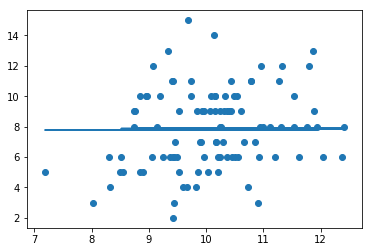

In [11]:
params = result.params
preds = np.exp(params[0] + params[1]*data.d)
plt.plot(data.x, preds)
plt.scatter(data.x, data.y)

with combination of numerical and categorical features

In [12]:
result = sfm.glm(formula='y ~ x + d', data=data, family=sm.families.Poisson()).fit()
result_xd = result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Thu, 23 May 2019   Deviance:                       84.808
Time:                        11:28:19   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
x              0.0801      0.037      2.162      0.031       0.007       0.153
d             -0.0320      0.074     -0.430      0.667      -0.178       0.114
==============================================================================
"""

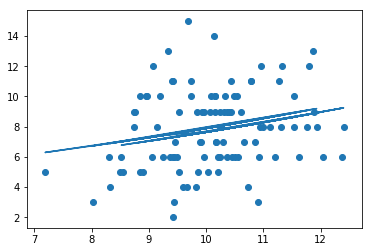

In [13]:
params = result.params
preds = np.exp(params[0] + params[1]*data.x + params[2]*data.d)
plt.plot(data.x, preds)
plt.scatter(data.x, data.y)

In [14]:
print('model comparison')
print('model :    log(L):    aic')
print('λ(x)  :  {0:6.3f}:{1:6.3f}'.format(result_x.llf, result_x.aic))
print('λ(d)  :  {0:6.3f}:{1:6.3f}'.format(result_d.llf, result_d.aic))
print('λ(x+d):  {0:6.3f}:{1:6.3f}'.format(result_xd.llf,result_xd.aic))

model comparison
model :    log(L):    aic
λ(x)  :  -235.386:474.773
λ(d)  :  -237.627:479.255
λ(x+d):  -235.294:476.587
